In [0]:
import pre
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
label=label=pre.create_label(1)
corpus=pre.create_sentence_list(1)
from nltk.stem import SnowballStemmer
 
st = SnowballStemmer("english")
text = pre.norm_corpus
 
output = []
for sentence in text:
    output.append(" ".join([st.stem(i) for i in sentence.split()]))
fileid=pre.fileid
tv = TfidfVectorizer(min_df=0., max_df=1.,max_features=1500 ,use_idf=True,lowercase=True,ngram_range=(1,2),analyzer=u'word',smooth_idf=True)
tv_matrix = tv.fit_transform(output)
tv_matrix = tv_matrix.toarray()

print(len(tv_matrix))
print(label)
print(pre.norm_corpus)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13531
[['NULL'], ['CMP'], ['EMP'], ['NOV', 'CMP'], ['NULL'], ['EMP'], ['CMP', 'EMP'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['CLA'], ['CMP'], ['SUB'], ['CMP', 'EMP'], ['SUB', 'EMP'], ['SUB', 'CMP'], ['EMP'], ['EMP'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['EMP'], ['CMP'], ['NULL'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['CMP'], ['NULL'], ['NULL'], ['EMP'], ['SUB'], ['SUB', 'REC'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['NULL'], ['PNF'], ['EMP'], ['SUB', 'CMP'], ['CLA', 'SUB', 'EMP'], ['SUB', 'CMP'], ['NULL'], ['EMP'], ['NULL'], ['IMP', 'EMP'], ['EMP'], ['EMP'], ['IMP', 'EMP'], ['EMP'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['NULL'], ['EMP'], ['CNT'], ['EMP'], ['EMP'], ['NULL'], ['EMP'], ['NULL'], ['SUB', 'CMP'], ['SUB', 'CMP'], ['EMP'], ['EMP'], ['EMP'], ['EMP'], ['CMP'], ['SUB'], ['CLA'], ['CLA'], ['NULL'], ['NULL'], ['CMP'], ['CMP'], ['EMP'], ['CMP'], ['SUB'], ['SUB'], ['CLA'], ['SUB'], ['SUB'], ['EMP'], ['EMP'], ['C

In [0]:
new_label=[]
new_tv=[]
new_fileid=[]
new_corpus=[]
length = len(tv_matrix)
for i in range(0, length):
  for j in range(0,len(label[i])):
    new_tv.append(tv_matrix[i])
    new_label.append(label[i][j])
    new_fileid.append(fileid[i])
    new_corpus.append(text[i])

In [0]:
import numpy as np
num_rows= len(new_tv)
num_colms=len(new_tv[0])
modified_tv=[]
padding=np.zeros(num_colms, dtype = int)
num_rows= len(new_tv)
for i in range(0,num_rows):
  if (i ==0):
    x=np.append(padding,new_tv[0])
    x=np.append(x,new_tv[1])
    modified_tv.append(x)

  elif(i==(num_rows-1)):
    x=np.append(new_tv[num_rows-2],new_tv[num_rows-1])
    x=np.append(x,padding)
    modified_tv.append(x)
  else:
    x=np.append(new_tv[i-1],new_tv[i])
    x=np.append(x,new_tv[i+1])
    modified_tv.append(x)

modified_tv
df_tfidf=pre.pd.DataFrame(pre.np.round(modified_tv, 10))
df_tfidf["tag"]=new_label
df_tfidf

0    1    2    3    4    5  ...  4495  4496  4497  4498  4499   tag
0      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0  NULL
1      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   CMP
2      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP
3      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   NOV
4      0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   CMP
...    ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
14928  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP
14929  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP
14930  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP
14931  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   PNF
14932  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   EMP

[14933 rows x 4501 columns]

Creating X

In [0]:
import numpy as np
X_df=df_tfidf[df_tfidf.columns[0:-1]] #X dataframe
X=X_df.to_numpy()    # X in array
y=df_tfidf["tag"]
print(np.unique(df_tfidf["tag"]))
class_names=np.unique(df_tfidf["tag"])

['APR' 'CLA' 'CMP' 'CNT' 'EMP' 'IMP' 'NOV' 'NULL' 'PNF' 'REC' 'SUB']


In [0]:
# for i in range(0,len(new_label)):
#   if(new_label[i]=='PNF'):
#     print(new_fileid[i])


SPLIT

In [0]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
y_tr=y_tr.reset_index()['tag'].tolist()
print(X_tr.shape)
print(len(y_tr))

(10005, 4500)
10005


In [0]:
keys_level1=['INT', 'PDI', 'MET', 'RWK', 'DAT', 'RES', 'ANA', 'TNF', 'EXP', 'BIB', 'OAL', 'FWK', 'EXT', 'ABS', 'CNT']
keys_level2=['NULL', 'CMP', 'EMP', 'NOV', 'CLA', 'SUB', 'IMP', 'REC', 'CNT', 'PNF', 'APR']

freq_train=Counter(y_tr)
print(freq_train)
c=0
def increase(keys, freq, sen,tag,threshold):
  length=len(sen)
  for key in keys:
    
    if (freq[key] < threshold and freq[key] > 0):
      inc= int(threshold/ freq[key])
      for i in range(0,length):
        if (tag[i] == key):
          for j in range(0,inc):
            tag.append(tag[i])
            sen= np.append(sen, [sen[i]], axis=0)
            global c
            c=c+1
    global X_train
    X_train = sen
    global y_train
    y_train = tag

increase(keys_level2, freq_train, X_tr, y_tr,1500)
print(Counter(y_train))

Counter({'EMP': 4117, 'NULL': 2092, 'CMP': 832, 'SUB': 813, 'CLA': 590, 'PNF': 473, 'IMP': 424, 'NOV': 342, 'REC': 140, 'CNT': 113, 'APR': 69})
Counter({'EMP': 4117, 'NULL': 2092, 'PNF': 1892, 'CLA': 1770, 'NOV': 1710, 'IMP': 1696, 'CMP': 1664, 'SUB': 1626, 'CNT': 1582, 'REC': 1540, 'APR': 1518})


In [0]:
print(X_train.shape)
print(len(y_train))
print(c)
print(length)
print(y_train)

(21207, 4500)
21207
11202
13531
['NULL', 'CMP', 'EMP', 'NOV', 'CMP', 'NULL', 'EMP', 'CMP', 'EMP', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'CLA', 'CMP', 'SUB', 'CMP', 'EMP', 'SUB', 'EMP', 'SUB', 'CMP', 'EMP', 'EMP', 'NULL', 'NULL', 'NULL', 'NULL', 'EMP', 'CMP', 'NULL', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'CMP', 'NULL', 'NULL', 'EMP', 'SUB', 'SUB', 'REC', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'NULL', 'PNF', 'EMP', 'SUB', 'CMP', 'CLA', 'SUB', 'EMP', 'SUB', 'CMP', 'NULL', 'EMP', 'NULL', 'IMP', 'EMP', 'EMP', 'EMP', 'IMP', 'EMP', 'EMP', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'EMP', 'CNT', 'EMP', 'EMP', 'NULL', 'EMP', 'NULL', 'SUB', 'CMP', 'SUB', 'CMP', 'EMP', 'EMP', 'EMP', 'EMP', 'CMP', 'SUB', 'CLA', 'CLA', 'NULL', 'NULL', 'CMP', 'CMP', 'EMP', 'CMP', 'SUB', 'SUB', 'CLA', 'SUB', 'SUB', 'EMP', 'EMP', 'CLA', 'CLA', 'CLA', 'SUB', 'NULL', 'NULL', 'EMP', 'EMP', 'EMP', 'SUB', 'EMP', 'SUB', 'EMP', 'SUB', 'PNF', 'EMP', 'CNT', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP', 'EMP',

LOGISTIC

In [0]:

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logmodel = LogisticRegression(class_weight='balanced',solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

def heatconmat(y_true,y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(9,6))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap='gist_earth_r',
                yticklabels=sorted(y_test.unique()))
    plt.show()
    print(classification_report(y_true,y_pred))

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_LOGISTIC.xlsx")

MULTINOMIAL

In [0]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_NB.xlsx")

RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         APR       0.62      0.24      0.35        41
         CLA       0.65      0.59      0.62       264
         CMP       0.45      0.36      0.40       430
         CNT       0.33      0.02      0.05        41
         EMP       0.52      0.82      0.63      2074
         IMP       0.34      0.09      0.15       268
         NOV       0.60      0.55      0.57       188
        NULL       0.55      0.31      0.40       987
         PNF       0.46      0.32      0.37       184
         REC       0.62      0.50      0.55        72
         SUB       0.28      0.05      0.08       379

    accuracy                           0.52      4928
   macro avg       0.49      0.35      0.38      4928
weighted avg       0.50      0.52      0.47      4928

Accuracy: 0.5188717532467533


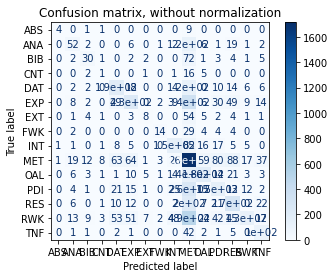

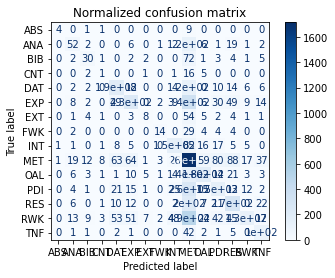

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_RANDOMFOR.xlsx")

SVM

In [0]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# Make a decision tree and train
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_SVM.xlsx")

SGD

In [0]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_SGD.xlsx")

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [0]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("TFIDF_DECISION_TREE.xlsx")

In [0]:
y_test=y_test.reset_index()['tag'].tolist()
print(y_test)

In [0]:


from sklearn.linear_model import LogisticRegression

# Make a decision tree and train
clf = LogisticRegression(class_weight='balanced',solver='liblinear')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

In [0]:
y_test=y_test.reset_index()['tag'].tolist()

from sklearn.linear_model import LogisticRegression

# Make a decision tree and train
clf = LogisticRegression(class_weight='balanced',solver='liblinear')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

------------------------------FOR KFOLD---------------------------------

LOGISTIC

In [0]:
y_test=y_test.reset_index()['tag'].tolist()

from sklearn.linear_model import LogisticRegression

# Make a decision tree and train
clf = LogisticRegression(class_weight='balanced',solver='liblinear')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

MULTINOMIAL

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

SVM

In [0]:
from sklearn import svm
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
clf = DecisionTreeClassifier()

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))